
# 5.3.1 The Validation Set Approach

In [49]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('data/Auto3.csv')
df.info()
df


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
mpg             397 non-null float64
cylinders       397 non-null int64
displacement    397 non-null float64
horsepower      397 non-null object
weight          397 non-null int64
acceleration    397 non-null float64
year            397 non-null int64
origin          397 non-null int64
name            397 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


In [3]:
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

df

height has been deprecated.



,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


In [4]:
df.horsepower

0      130
1      165
2      150
3      150
4      140
5      198
6      220
7      215
8      225
9      190
10     170
11     160
12     150
13     225
14      95
15      95
16      97
17      85
18      88
19      46
20      87
21      90
22      95
23     113
24      90
25     215
26     200
27     210
28     193
29      88
30      90
31      95
32       ?
33     100
34     105
35     100
36      88
37     100
38     165
39     175
40     153
41     150
42     180
43     170
44     175
45     110
46      72
47     100
48      88
49      86
50      90
51      70
52      76
53      65
54      69
55      60
56      70
57      95
58      80
59      54
60      90
61      86
62     165
63     175
64     150
65     153
66     150
67     208
68     155
69     160
70     190
71      97
72     150
73     130
74     140
75     150
76     112
77      76
78      87
79      69
80      86
81      92
82      97
83      80
84      88
85     175
86     150
87     145
88     137
89     150
90     198

In [5]:
df = pd.read_csv('data/Auto3.csv', na_values='?').dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null int64
acceleration    392 non-null float64
year            392 non-null int64
origin          392 non-null int64
name            392 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


 다시 데이터셋 전체를 살펴보면 

In [6]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190.0,3850,8.5,70,1,amc ambassador dpl


### 실행안함 -참고용 (교과서보다 복잡하게)

In [7]:
from sklearn.model_selection import train_test_split

# create a Python list of feature names
feature_cols = list(df)
print(type(feature_cols))

feature_cols.remove('mpg')
feature_cols.remove('name')
print(feature_cols)

# use the list to select a subset of the original DataFrame
X = df[feature_cols]
y = df.mpg

# print the first 5 rows
print(X.head())


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


<class 'list'>
['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']
   cylinders  displacement  horsepower  weight  acceleration  year  origin
0          8         307.0       130.0    3504          12.0    70       1
1          8         350.0       165.0    3693          11.5    70       1
2          8         318.0       150.0    3436          11.0    70       1
3          8         304.0       150.0    3433          12.0    70       1
4          8         302.0       140.0    3449          10.5    70       1


###  Linear Regression 교과서 대로

In [37]:
from sklearn.model_selection import train_test_split

# create a Python list of feature names

X = df[['horsepower']]
y = df.mpg

# print the first 5 rows
X.head()


,horsepower
0,130.0
1,165.0
2,150.0
3,150.0
4,140.0


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(196, 1)
(196,)
(196, 1)
(196,)


We then use ${\tt LinearRegression()}$ to fit a linear regression to predict ${\tt mpg}$ from ${\tt horsepower}$ using only
the observations corresponding to the training set.

In [23]:
linreg = LinearRegression()
linreg_fit = linreg.fit(X_train, y_train)

We now use the ${\tt predict()}$ function to estimate the response for the test
observations, and we use ${\tt sklearn}$ to caclulate the MSE.

In [24]:
y_pred = linreg_fit.predict(X_test)

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test, y_pred)
    
print(MSE)

24.8021206206


MSE 값이 교과서와 일치하지 않으나, 유사하다. 이는 random하게 traing data와 test data를 분리했기 때문이다.

In [25]:
from sklearn.preprocessing import PolynomialFeatures

# Quadratic
poly = PolynomialFeatures(degree=2)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

linreg_fit = linreg.fit(X_train2, y_train)
print(mean_squared_error(y_test, linreg_fit.predict(X_test2)))

# Cubic
poly = PolynomialFeatures(degree=3)
X_train3 = poly.fit_transform(X_train)
X_test3 = poly.fit_transform(X_test)

linreg_fit = linreg.fit(X_train3, y_train)
print(mean_squared_error(y_test, linreg_fit.predict(X_test3)))

18.8482926033
18.8051113587


These error rates are 20.25 and 20.33, respectively. If we choose a different
training set instead, then we will obtain somewhat different errors on the
validation set. We can test this out by setting a different random seed:

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)

linreg_fit = linreg.fit(X_train, y_train)

# Linear
y_pred = linreg_fit.predict(X_test)
MSE = mean_squared_error(y_test, y_pred)    
print(MSE)

# Quadratic
poly = PolynomialFeatures(degree=2)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

linreg_fit = linreg.fit(X_train2, y_train)
print(mean_squared_error(y_test, linreg_fit.predict(X_test2)))

# Cubic
poly = PolynomialFeatures(degree=3)
X_train3 = poly.fit_transform(X_train)
X_test3 = poly.fit_transform(X_test)

linreg_fit = linreg.fit(X_train3, y_train)
print(mean_squared_error(y_test, linreg_fit.predict(X_test3)))

23.44264397
18.5501988019
18.5952222946


Using this split of the observations into a training set and a validation
set, we find that the validation set error rates for the models with linear,
quadratic, and cubic terms are 25.11, 19.72, and 19.92, respectively.

These results are consistent with our previous findings: a model that
predicts ${\tt mpg}$ using a quadratic function of ${\tt horsepower}$ performs better than
a model that involves only a linear function of ${\tt horsepower}$, and there is
little evidence in favor of a model that uses a cubic function of ${\tt horsepower}$.

# 5.3.2 Leave-One-Out Cross-Validation

The LOOCV estimate can be automatically computed for any generalized linear model using the `LeaveOneOut()` and `KFold()` functions.

In [33]:
from sklearn.model_selection import LeaveOneOut
X = np.array([[1, 2], [3, 4], [5,6]])
y = np.array([10, 20, 30])
loo = LeaveOneOut()
loo.get_n_splits(X)
print(X)

print(loo)
print(loo.split(X))

for train_index, test_index in loo.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print(X_train, X_test, y_train, y_test)


[[1 2]
 [3 4]
 [5 6]]
LeaveOneOut()
<generator object BaseCrossValidator.split at 0x000000DB1433AFC0>
TRAIN: [1 2] TEST: [0]
[[3 4]
 [5 6]] [[1 2]] [20 30] [10]
TRAIN: [0 2] TEST: [1]
[[1 2]
 [5 6]] [[3 4]] [10 30] [20]
TRAIN: [0 1] TEST: [2]
[[1 2]
 [3 4]] [[5 6]] [10 20] [30]


In [38]:
linreg_fit = linreg.fit(X_train, y_train)

from sklearn.model_selection import LeaveOneOut, cross_val_score
loo = LeaveOneOut()

#X = df['horsepower'].values.reshape(-1,1)
#print(X)
#y = df['mpg'].values.reshape(-1,1)
#print(y)
crossvalidation =loo.get_n_splits(X)

scores = cross_val_score(linreg, X, y, scoring="neg_mean_squared_error", cv=crossvalidation,
 n_jobs=1)

print("Folds: " + str(len(scores)) + ", MSE: " + str(np.mean(np.abs(scores))) + ", STD: " + str(np.std(scores)))


# 동일한 결과

from sklearn.model_selection import KFold

crossvalidation = KFold(n_splits=392, random_state=None, shuffle=False)

scores = cross_val_score(linreg, X, y, scoring="neg_mean_squared_error", cv=crossvalidation,
 n_jobs=1)

print("Folds: " + str(len(scores)) + ", MSE: " + str(np.mean(np.abs(scores))) + ", STD: " + str(np.std(scores)))


Folds: 392, MSE: 24.2315135179, STD: 36.7973150364
Folds: 392, MSE: 24.2315135179, STD: 36.7973150364


Our cross-validation estimate for the test error is approximately 24.23. We can repeat this procedure for increasingly complex polynomial fits.
To automate the process, we use the `for()` function to initiate a for loop
which iteratively fits polynomial regressions for polynomials of order `i = 1`
to `i = 5` and computes the associated cross-validation error. 

This command may take a couple of minutes to run.

In [45]:
cv_errors = []

for i in range(1,6):
    poly = PolynomialFeatures(degree=i)
    X_current = poly.fit_transform(X)
    scores = cross_val_score(linreg, X_current, y, scoring="neg_mean_squared_error", cv=crossvalidation,
 n_jobs=1)
    
    print("Degree-"+str(i)+" polynomial MSE: " + str(np.mean(np.abs(scores))) + ", STD: " + str(np.std(scores)))
    cv_errors.append(np.mean(np.abs(scores)))



Degree-1 polynomial MSE: 24.2315135179, STD: 36.7973150364
Degree-2 polynomial MSE: 19.2482131245, STD: 34.9984461518
Degree-3 polynomial MSE: 19.3349840641, STD: 35.7651356779
Degree-4 polynomial MSE: 19.4244303117, STD: 35.6833527696
Degree-5 polynomial MSE: 19.0332070246, STD: 35.3172974021


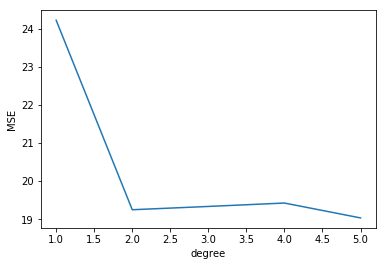

In [50]:
plt.plot(range(1,6), cv_errors)
plt.xlabel("degree")
plt.ylabel("MSE")        

Here we see a sharp drop in the estimated test MSE between
the linear and quadratic fits, but then no clear improvement from using
higher-order polynomials.

# 5.3.3 k-Fold Cross-Validation

The `KFold` function can (intuitively) also be used to implement `k`-fold CV. Below we
use `k = 10`, a common choice for `k`, on the `Auto` data set. We once again set
a random seed and initialize a vector in which we will print the CV errors
corresponding to the polynomial fits of orders one to ten.

Degree-1 polynomial MSE: 27.4399336523, STD: 14.5102507113
Degree-2 polynomial MSE: 21.2358400558, STD: 11.7973275289
Degree-3 polynomial MSE: 21.3366061834, STD: 11.8443397145
Degree-4 polynomial MSE: 21.3538869893, STD: 11.9863323339
Degree-5 polynomial MSE: 20.9056059242, STD: 12.1854644507
Degree-6 polynomial MSE: 20.7575066051, STD: 12.0896514357
Degree-7 polynomial MSE: 20.9534441646, STD: 12.0602397936
Degree-8 polynomial MSE: 21.0772694862, STD: 12.0446381509
Degree-9 polynomial MSE: 21.0355307425, STD: 11.9492762341
Degree-10 polynomial MSE: 20.9854321339, STD: 11.8046254226


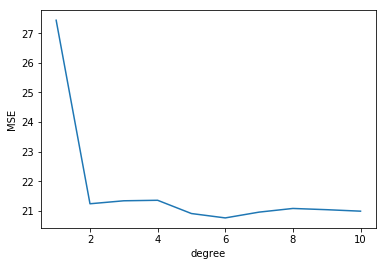

In [54]:
cv_errors = []
crossvalidation = KFold(n_splits=10, random_state=1, shuffle=False)

for i in range(1,11):
    poly = PolynomialFeatures(degree=i)
    X_current = poly.fit_transform(X)
    scores = cross_val_score(linreg, X_current, y, scoring="neg_mean_squared_error", cv=crossvalidation,
 n_jobs=1)
    print("Degree-"+str(i)+" polynomial MSE: " + str(np.mean(np.abs(scores))) + ", STD: " + str(np.std(scores)))
    cv_errors.append(np.mean(np.abs(scores)))

    
plt.plot(range(1,11), cv_errors)
plt.xlabel("degree")
plt.ylabel("MSE")        

# 5.3.4 The Bootstrap

We illustrate the use of the bootstrap in the simple example of Section 5.2,
as well as on an example involving estimating the accuracy of the linear
regression model on the `Auto`data set.

# Estimating the Accuracy of a Statistic of Interest

One of the great advantages of the bootstrap approach is that it can be
applied in almost all situations. No complicated mathematical calculations
are required. Performing a bootstrap analysis in R entails only two steps.

- First, we must create a function that computes the statistic of interest.
- Second, we use the `boot()` function, which is part of the boot library, to perform the bootstrap by repeatedly sampling observations from the data set with replacement.

The `Portfolio` data set in the `ISLR` package is described in Section 5.2. It has variables called `X` and `Y`. 

In [92]:
df = pd.read_csv('data/Portfolio.csv')
df.head()

,Unnamed: 0,X,Y
0,1,-0.895251,-0.234924
1,2,-1.562454,-0.885176
2,3,-0.417090,0.271888
3,4,1.044356,-0.734198
4,5,-0.315568,0.841983


In [93]:
df = pd.read_csv('data/Portfolio.csv').dropna().drop('Unnamed: 0', axis = 1)
df.head()

,X,Y
0,-0.895251,-0.234924
1,-1.562454,-0.885176
2,-0.417090,0.271888
3,1.044356,-0.734198
4,-0.315568,0.841983


To illustrate the use of the bootstrap on this data, we must first create
a function, `alpha()`, which takes as input the data and outputs the estimate for $\alpha$ (described in more detail on page 187).

In [94]:
def alpha(X,Y):
    return ((np.var(Y)-np.cov(X,Y)[1,0])/(np.var(X)+np.var(Y)-2*np.cov(X,Y)[1,0]))

This function returns, or outputs, an estimate for $\alpha$ based on applying
(5.7) to the observations indexed by the argument index. For instance, the
following command tells `python` to estimate $\alpha$ using all 100 observations.

In [98]:
X = df.X[0:100]
y = df.Y[0:100]

print(alpha(X,y))

0.57665115161


The next command uses the `sample()` function to randomly select 100 observations
from the range 1 to 100, with replacement. This is equivalent
to constructing a new bootstrap data set and recomputing $\hat{\alpha}$ based on the
new data set.

In [117]:
from sklearn.utils import resample

X, y = resample(df.X, df.Y, replace=True, n_samples=100)
print(alpha(X,y))

# 실행할 때마다 값이 달라짐

0.503186900963


We can implement a bootstrap analysis by performing this command many
times, recording all of the corresponding estimates for $\alpha$, and computing the resulting standard deviation. However, the `boot()`function automates
this approach. Below we produce $1,000$ bootstrap estimates for $\alpha$:

In [118]:
#10000 simulation

tresult=0
for i in range(0,10000):
    X, y = resample(df.X, df.Y, replace=True, n_samples=100)
    result = alpha(X,y)
    tresult += result

print(tresult / 10000)


0.578909024741
